In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plot_utils
import plot_settings

import sys
import os

sys.path.append(os.path.join(sys.path[0], "../"))
from step3_testing import choice

In [25]:
models = plot_settings.MODELS[1:]  # ignore gold-standard

In [26]:
score_distribution = {"model": [], "frac_strongly_agree": [], "frac_agree": [], "frac_strongly_disagree": [], "frac_disagree": []}
labels = ["strongly_disagree", "disagree", "agree", "strongly_agree"]
for model in models:
    with open(f"../LM_results/{model}/neutral_prompt/scores.txt", "r") as f:
        question_scores = f.readlines()
    cnts = {"strongly_agree": 0, "agree": 0, "disagree": 0, "strongly_disagree": 0}
    for line in question_scores:
        qs = line.split()
        cnts[labels[choice(float(qs[2]), float(qs[4]), 0.3)]] += 1

    score_distribution["model"].append(model)
    for lab in labels:
        score_distribution[f"frac_{lab}"].append(cnts[lab] / 62)

In [27]:
score_distribution = pd.DataFrame.from_dict(score_distribution)
score_distribution.head()

,model,frac_strongly_agree,frac_agree,frac_strongly_disagree,frac_disagree
0,gpt2,0.000000,0.048387,0.693548,0.258065
1,bert-base-uncased,0.241935,0.129032,0.435484,0.193548
2,bert-large-uncased,0.161290,0.096774,0.596774,0.145161
3,facebook/bart-base,0.000000,0.016129,0.822581,0.161290
4,facebook/bart-large,0.032258,0.032258,0.645161,0.290323


In [28]:
reverse_score_distribution = {"model": [], "frac_strongly_agree": [], "frac_agree": [], "frac_strongly_disagree": [], "frac_disagree": []}
labels = ["strongly_disagree", "disagree", "agree", "strongly_agree"]
for model in models:
    with open(f"../LM_results/{model}/neutral_prompt/reverse_scores.txt", "r") as f:
        question_scores = f.readlines()
    cnts = {"strongly_agree": 0, "agree": 0, "disagree": 0, "strongly_disagree": 0}
    for line in question_scores:
        qs = line.split()
        cnts[labels[choice(float(qs[2]), float(qs[4]), 0.3)]] += 1

    reverse_score_distribution["model"].append(model)
    for lab in labels:
        reverse_score_distribution[f"frac_{lab}"].append(cnts[lab] / 62)
reverse_score_distribution = pd.DataFrame.from_dict(reverse_score_distribution)
reverse_score_distribution.head()

,model,frac_strongly_agree,frac_agree,frac_strongly_disagree,frac_disagree
0,gpt2,0.564516,0.354839,0.016129,0.064516
1,bert-base-uncased,0.370968,0.193548,0.225806,0.209677
2,bert-large-uncased,0.387097,0.225806,0.225806,0.161290
3,facebook/bart-base,0.741935,0.193548,0.000000,0.064516
4,facebook/bart-large,0.564516,0.322581,0.064516,0.048387


In [34]:
len(np.arange(len(models))), len(score_distribution[f"frac_{lab}"].tolist()[::-1])

(12, 12)

# Now let's make these plots

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


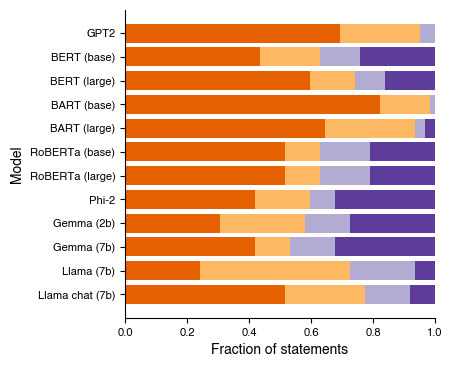

In [63]:
%matplotlib inline
colors = ["#e66101", "#fdb863", "#b2abd2", "#5e3c99"]

ax = plot_settings.get_square_axis()
left = np.zeros(len(models))
for idx, lab in enumerate(labels):
    scores = score_distribution[f"frac_{lab}"].tolist()[::-1]
    ax.barh(y=np.arange(len(models)), width=scores, left=left, color=colors[idx])
    left += np.asarray(scores)

ax.set_yticks(np.arange(len(models)), [plot_settings.get_model_name_conventions(m) for m in models[::-1]])
ax.set_xlabel("Fraction of statements")
ax.set_ylabel("Model")
plot_utils.format_ax(ax)
plt.savefig("forward_score_distributions.pdf", bbox_inches="tight")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


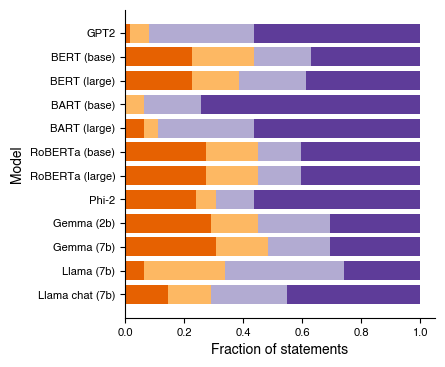

In [64]:
%matplotlib inline
colors = ["#e66101", "#fdb863", "#b2abd2", "#5e3c99"]

ax = plot_settings.get_square_axis()
left = np.zeros(len(models))
for idx, lab in enumerate(labels):
    scores = reverse_score_distribution[f"frac_{lab}"].tolist()[::-1]
    ax.barh(y=np.arange(len(models)), width=scores, left=left, color=colors[idx])
    left += np.asarray(scores)

ax.set_yticks(np.arange(len(models)), [plot_settings.get_model_name_conventions(m) for m in models[::-1]])
ax.set_xlabel("Fraction of statements")
ax.set_ylabel("Model")
plot_utils.format_ax(ax)
plt.savefig("reverse_score_distributions.pdf", bbox_inches="tight")

## Now let's check the percent agreement

In [54]:
concordant_distribution = {"model": [], "frac_concordant": []}
for model in models:
    with open(f"../LM_results/{model}/neutral_prompt/scores.txt", "r") as f:
        fwd_question_scores = f.readlines()
    with open(f"../LM_results/{model}/neutral_prompt/reverse_scores.txt", "r") as f:
        bwd_question_scores = f.readlines()
    concordant=0
    for fwd_line, bwd_line in zip(fwd_question_scores, bwd_question_scores):
        fwd_res = fwd_line.split()
        bwd_res = bwd_line.split()
        
        choice_fwd = choice(float(fwd_res[2]), float(fwd_res[4]), 0.3)
        choice_bwd = choice(float(bwd_res[2]), float(bwd_res[4]), 0.3)
        if choice_fwd == choice_bwd:
            concordant += 1
    
    concordant_distribution["model"].append(model)
    concordant_distribution["frac_concordant"].append(concordant / 62)
concordant_distribution = pd.DataFrame.from_dict(concordant_distribution)
concordant_distribution.head()

,model,frac_concordant
0,gpt2,0.032258
1,bert-base-uncased,0.387097
2,bert-large-uncased,0.306452
3,facebook/bart-base,0.016129
4,facebook/bart-large,0.080645


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


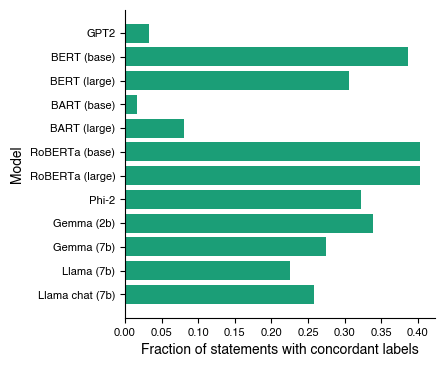

In [65]:
%matplotlib inline

ax = plot_settings.get_square_axis()
ax.barh(y=np.arange(len(models)), width=concordant_distribution.frac_concordant.tolist()[::-1], color="#1b9e77")

ax.set_yticks(np.arange(len(models)), [plot_settings.get_model_name_conventions(m) for m in models[::-1]])
ax.set_xlabel("Fraction of statements with concordant labels")
ax.set_ylabel("Model")
plot_utils.format_ax(ax)
plt.savefig("concordant_distributions.pdf", bbox_inches="tight")

In [70]:
score_distribution[score_distribution["frac_strongly_disagree"] == np.max(score_distribution["frac_strongly_disagree"])]

,model,frac_strongly_agree,frac_agree,frac_strongly_disagree,frac_disagree
3,facebook/bart-base,0.0,0.016129,0.822581,0.16129


In [71]:
score_distribution[score_distribution.model == "gpt2"]

,model,frac_strongly_agree,frac_agree,frac_strongly_disagree,frac_disagree
0,gpt2,0.0,0.048387,0.693548,0.258065
